In [2]:
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from matplotlib          import cm
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import IFrame, display
import math

In [4]:
file = 'Figures/LikelihoodContour.pdf'
IFrame(file, width=600, height=400)

# Maximum Likelihood estimation

In [6]:
def LikePoisson(lambda_, n):
    return ( np.exp(-lambda_)*lambda_**n ) / math.factorial(n)

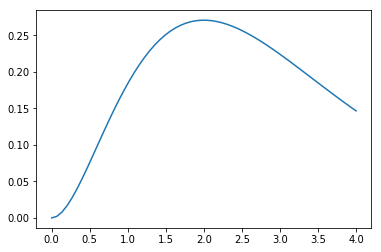

In [7]:
l = np.linspace(0.,4.,60)
likelihoodPois = LikePoisson(l,2)
plt.plot(l, likelihoodPois)

(array([1., 0., 0., 2., 0., 1., 3., 0., 1., 2.]),
 array([-5.84192597, -4.5755447 , -3.30916343, -2.04278216, -0.77640089,
         0.48998039,  1.75636166,  3.02274293,  4.2891242 ,  5.55550548,
         6.82188675]),
 <a list of 10 Patch objects>)

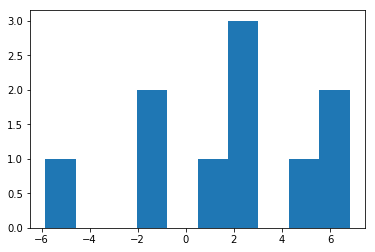

In [8]:
Data = np.loadtxt('data/dataMLikelihood.dat')
plt.hist(Data)

Objetivo: Encontrar el mejor valor de sigma dada la secuencia de datos observados {$x_{k}$} y la incertidumbre asociada:

$$ prob(\sigma|\{ x_{k}\}) \propto prob(\{ x_{k}\}|\sigma)prob(\sigma)$$

Asumimos la probabilidad de $P(\sigma) = A$, para $1 < \sigma < 10$ y cero en otro caso.

In [9]:
def probabilidad(x,sigma):
    return ( 1./np.sqrt(2.*np.pi*sigma**2))*np.exp( -0.5*(x/sigma)**2 )

In [10]:
def GetLikelihood(x,sigma):
    
    like = 1.0
    for i in x:
        like *= probabilidad(i,sigma)
        
    return like

In [11]:
sigmai, sigmaf, Npoints = 1.,10.,1000
sigma = np.linspace(sigmai,sigmaf,Npoints)
Likelihood = GetLikelihood(Data, sigma)

Text(0,0.5,'$L \\times {\\rm{prob}(\\sigma)}$')

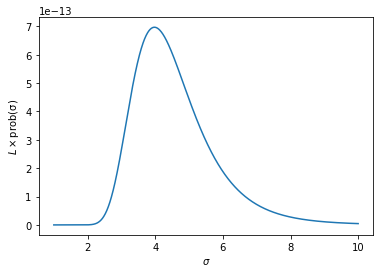

In [13]:
plt.figure()
plt.plot(sigma,Likelihood)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$L \times {\rm{prob}(\sigma)}$')

In [16]:
print(np.max(Likelihood))

6.967942130731746e-13


In [17]:
def GetDerivative(x,sigma):
    h = 0.000001
    d = (GetLikelihood(x,sigma+h)-GetLikelihood(x,sigma-h))/(2.*h)
    return d

In [18]:
Dlikelihood = GetDerivative(Data, sigma)

Text(0,0.5,'$ dL/d\\sigma$')

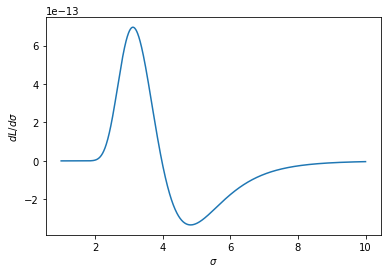

In [19]:
plt.figure()
plt.plot(sigma, Dlikelihood)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$ dL/d\sigma$')

In [20]:
def Get2Derivative(x, sigma):
    h = 0.00001
    d = (GetDerivative(x, sigma+h)-GetDerivative(x, sigma-h))/(2.*h)
    return d

In [21]:
D2likelihood = Get2Derivative(Data, sigma)

Text(0,0.5,'$ d^{2}L/d\\sigma^{2}}$')

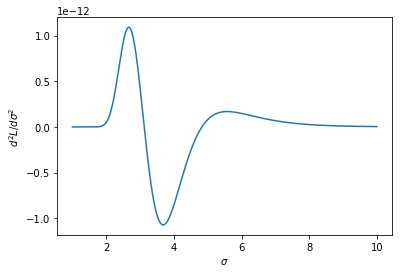

In [22]:
plt.figure()
plt.plot(sigma, D2likelihood)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$ d^{2}L/d\sigma^{2}}$')

El mejor valor de $\sigma$ dada la distribución de datos $\{x_{k}\}$, maximiza la función de Likelihood.
$$ \frac{dL}{d\sigma}\bigg|_{\sigma_{0}} = 0  $$ 

In [23]:
def NewtonRaphson(x,sigmai):
    precision = 1e-20
    sigman = sigmai
    
    while np.abs( GetDerivative(x,sigman) ) > precision:
        sigman -= GetDerivative(x,sigman)/Get2Derivative(x,sigman)
    return sigman

In [24]:
SigmaValue = NewtonRaphson(Data,4.0)
print(SigmaValue)

3.9760525027321862


Para encontrar el error en la estimación usamos el valor maximo en la segunda derivada. No obstante, el likelihood debe estar normalizado correctamente.

$$ \Delta \sigma_{0} = -\frac{d^{2}L}{d\sigma^{2}}\bigg|_{\sigma_{0}} $$ 

In [25]:
test = -Get2Derivative(Data, SigmaValue)
print(test)

8.815123029948575e-13


In [26]:
def IntegrateLikelihood(x, sigma_min, sigma_max):
    # Trapecio
    Npoints = 1000
    s = np.linspace(sigma_min, sigma_max, Npoints)
    Likelihood = GetLikelihood(x,s)
    h = s[1]-s[0]
    w = np.ones(Npoints)*h
    w[0] = 0.5*h
    w[-1] = 0.5*h
    
    integral = np.sum(Likelihood*w)
    
    return integral

In [27]:
Normalization = IntegrateLikelihood(Data, 1.0,10.)
print(Normalization)

1.7051343479160216e-12


In [28]:
DeltaSigma = -Get2Derivative(Data, SigmaValue)/Normalization
print(DeltaSigma)

0.5169752776795699


$$ \hat{\theta} = 3.97 \pm 0.51 $$

Este error siempre es simétrico, por que suponemos que cerca del máximo la distribución en Gausiana.

In [29]:
D2Likelihood = Get2Derivative(Data, sigma)/Normalization

Text(0,0.5,'$d^{2}L\\d \\sigma^{2}$')

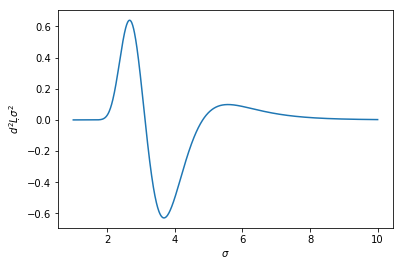

In [30]:
plt.figure()
plt.plot(sigma, D2Likelihood)
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$d^{2}L\d \sigma^{2}$')